# Técnicas de reducción de la dimensionalidad

## 1. Librerias y datos

In [2]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
0,0,0.0,13.077658,2015.0,27.0,1.0,2.0,5.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,7.755577,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,0.0,13.077658,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Separamos la variable objetivo (is_canceled) de las demás.

In [4]:
x = data.iloc[:,1:26].values
y = data.iloc[:,0].values

## 2. Aplicación de PCA

### Normalizamos

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

### Autovectores y Autovalores
Calculamos los autovalores y autovectores de la matriz y los mostramos


In [6]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.86658513e-03  4.29191225e-01  2.32569279e-01 -2.50467322e-03
   4.66285447e-02  4.05281131e-01 -3.50067108e-01 -3.20682091e-01
   8.45936804e-02  2.41861087e-01 -2.40405958e-01 -2.49851637e-01
  -1.23760730e-01 -1.63667078e-01  1.11244367e-01  7.77498165e-02
  -1.87894630e-01  7.54559418e-02  9.85929545e-02 -6.00000842e-02
  -9.47554560e-02  1.77211643e-01  8.41686743e-02  1.45992328e-01
  -1.95948178e-02]
 [-1.11308998e-01 -1.69624367e-01 -9.88610459e-02 -2.14937894e-03
   1.73413216e-01  1.45993485e-01  5.22498958e-02  1.26625417e-02
  -1.48729652e-02  2.27743587e-01  1.30920132e-01 -2.72871592e-01
   4.91140457e-01 -1.32710704e-01 -1.55284235e-01  4.73375444e-01
  -2.48199628e-01 -1.82077016e-01  1.14693047e-01  9.99181375e-02
   2.61583080e-01 -1.83785504e-01  1.23039592e-01 -8.50785159e-02
  -3.99257614e-02]
 [ 4.56925094e-01 -1.47359808e-01 -2.04606542e-02 -1.16581419e-02
   1.70737922e-01 -6.25480152e-01 -2.16682028e-01 -2.17062267e-01
  -5.74224874e-02  2.258

Hacemos una lista de parejas (autovector, autovalor), las ordenamos y visualizamos:

In [7]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
2.4639357493038476
2.310606698019139
1.814428226236206
1.600119313213236
1.2610391016182814
1.1410599979400105
1.115236385903995
1.060817529090786
1.0413711543317754
1.0237287422421715
1.0019417851360317
0.9827344700289451
0.9648310891075508
0.895051572053509
0.8797005529798074
0.8514429401463405
0.7967977016131343
0.735627970627176
0.7058768126976407
0.623503368830178
0.557718470914537
0.47588199117573604
0.4611254294332395
0.23583493803249295
0.0004213704362658251


A partir de los autovalores, calculamos la varianza explicada y representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada:

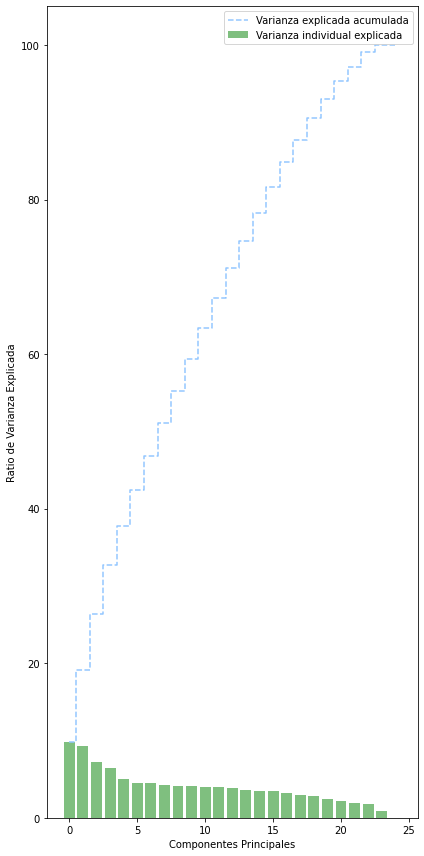

In [8]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 12))

    plt.bar(range(25), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(25), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()



No hay grandes componentes que aporten mucha información, asi que vamos a quedarnos con las 18 primeras componentes de tral forma que así tenemos más del 80% de la información:

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18',])

principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,-2.474984,0.780968,14.798547,0.198875,4.628477,-2.751210,-0.105307,-0.032650,0.333751,0.113394,-0.112809,-0.316944,1.379860,0.075490,-0.529825,-0.461486,0.595099,0.237123
1,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715
2,-2.288644,1.222566,14.790442,-4.079844,-0.926296,-0.041672,-0.138016,-0.045855,-0.844684,-0.173155,-1.308389,-0.191789,0.585394,0.525366,-0.036486,-0.208992,0.905597,0.151553
3,-2.477177,0.782790,14.786908,0.244327,3.335840,-3.564817,-0.233600,-0.436242,-0.631155,2.457818,-0.039006,-0.622743,1.104310,0.123546,-0.695594,-0.555218,-0.291966,0.042446
4,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-2.285838,-9.650028,-14.758504,7.063128,0.799854,-0.441390,-0.240094,-0.034821,-0.080276,0.132110,0.359551,-0.071191,-0.414918,0.104072,0.214385,0.452210,0.049069,-0.274382
29996,-2.435649,-9.796253,-14.779281,9.787888,-2.477276,-4.059625,20.181302,-2.789631,-0.263397,0.909008,0.813932,-0.362395,-0.667256,0.123934,-0.228444,-0.120673,0.162482,-0.118403
29997,-2.385286,-9.781181,-14.788718,8.762898,-0.080325,-1.164812,-0.340941,-0.703556,0.156871,2.999637,0.299346,-0.616559,-0.417735,-0.711078,-0.512739,0.097990,-0.106186,-0.184188
29998,-1.966802,-9.216735,-14.687010,1.441264,0.658197,-0.696161,-0.213911,0.211392,-1.180490,-0.303655,0.563471,0.399929,-0.966305,-0.567250,1.477813,-1.024491,-0.037409,0.066715


In [10]:
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis=1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,0
0,-2.474984,0.780968,14.798547,0.198875,4.628477,-2.751210,-0.105307,-0.032650,0.333751,0.113394,-0.112809,-0.316944,1.379860,0.075490,-0.529825,-0.461486,0.595099,0.237123,0
1,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715,1
2,-2.288644,1.222566,14.790442,-4.079844,-0.926296,-0.041672,-0.138016,-0.045855,-0.844684,-0.173155,-1.308389,-0.191789,0.585394,0.525366,-0.036486,-0.208992,0.905597,0.151553,2
3,-2.477177,0.782790,14.786908,0.244327,3.335840,-3.564817,-0.233600,-0.436242,-0.631155,2.457818,-0.039006,-0.622743,1.104310,0.123546,-0.695594,-0.555218,-0.291966,0.042446,3
4,-2.070870,1.526062,14.846015,-8.011370,-0.963042,0.095164,0.002121,0.976322,-0.604175,0.171256,0.158174,0.149180,0.398287,0.281844,-0.200670,-0.343388,0.838192,0.365715,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-2.285838,-9.650028,-14.758504,7.063128,0.799854,-0.441390,-0.240094,-0.034821,-0.080276,0.132110,0.359551,-0.071191,-0.414918,0.104072,0.214385,0.452210,0.049069,-0.274382,29995
29996,-2.435649,-9.796253,-14.779281,9.787888,-2.477276,-4.059625,20.181302,-2.789631,-0.263397,0.909008,0.813932,-0.362395,-0.667256,0.123934,-0.228444,-0.120673,0.162482,-0.118403,29996
29997,-2.385286,-9.781181,-14.788718,8.762898,-0.080325,-1.164812,-0.340941,-0.703556,0.156871,2.999637,0.299346,-0.616559,-0.417735,-0.711078,-0.512739,0.097990,-0.106186,-0.184188,29997
29998,-1.966802,-9.216735,-14.687010,1.441264,0.658197,-0.696161,-0.213911,0.211392,-1.180490,-0.303655,0.563471,0.399929,-0.966305,-0.567250,1.477813,-1.024491,-0.037409,0.066715,29998


Aunque después se realiza más en profundidad pruebas con TSNE, lo usamos ahora con las componentes principales que hemos calculado para ver los datos en dos dimensiones.

In [13]:
from sklearn.manifold import TSNE

Xs = TSNE(n_components=2, random_state=0).fit_transform(finalDf)

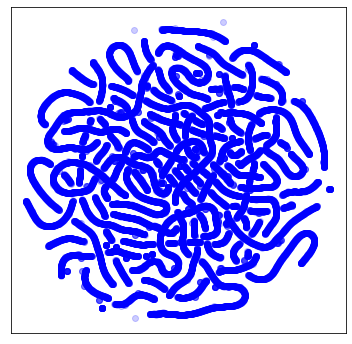

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(Xs[:, 0], Xs[:, 1], c = 'b', marker='o', alpha=0.2)
plt.xticks([])
plt.yticks([])
plt.show();

Vemos que el resultado obtenido no ha sido muy bueno ya que salen datos muy juntos y no podemos sacar grupos claros.

Pero es muy parecido al resultado obtenido con todas las variables en el punto "1. Aprendizaje no supervisado", por lo podríamos decir que el conjunto de datos se ve representado correctamente con estas componentes principales.

## 3. Aplicación de T-SNE

In [12]:
import seaborn as sns

data_subset = x
perplexity=[5,15,25,35,40]
for i in perplexity:
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    
    data['tsne-2d-one'] = tsne_results[:,0]
    data['tsne-2d-two'] = tsne_results[:,1]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="is_canceled",
        data=data,
        legend="full",
        alpha=0.3
    )
    plt.show()

NameError: name 'TSNE' is not defined